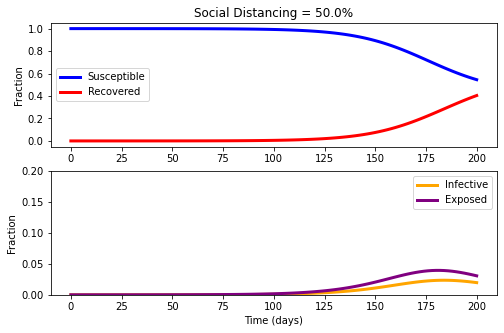

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

u = 0.5  # social distancing (0-1)
         # 0   = no social distancing
         # 0.1 = masks
         # 0.2 = masks and hybrid classes
         # 0.3 = masks, hybrid, and online classes

t_incubation = 5
t_infective = 3
R0 = 3
N = 100000 

# initial number of infected and recovered individuals
e0 = 1/N
i0 = 0.00
r0 = 0.00
s0 = 1 - e0 - i0 - r0
x0 = [s0,e0,i0,r0]

alpha = 1/t_incubation #rate of incubation
gamma = 1/t_infective #rate of removal
beta = R0*gamma #rate of contact

def covid(x,t):
    s,e,i,r = x
    dx = np.zeros(4)
    dx[0] = -(1-u)*beta * s * i
    dx[1] = (1-u)*beta * s * i - alpha * e
    dx[2] = alpha * e - gamma * i
    dx[3] = gamma*i
    return dx

t = np.linspace(0, 200, 101)
x = odeint(covid,x0,t)
s = x[:,0]; e = x[:,1]; i = x[:,2]; r = x[:,3]

# plot the data
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
plt.title('Social Distancing = '+str(u*100)+'%')
plt.plot(t,s, color='blue', lw=3, label='Susceptible')
plt.plot(t,r, color='red',  lw=3, label='Recovered')
plt.ylabel('Fraction')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,i, color='orange', lw=3, label='Infective')
plt.plot(t,e, color='purple', lw=3, label='Exposed')
plt.ylim(0, 0.2)
plt.xlabel('Time (days)')
plt.ylabel('Fraction')
plt.legend()

plt.show()